<h1 style='text-align: center;'> Abdelrahman Mohamed Mostafa </h1>

# Project Objective
Predicting the optimum number of clusters and represent it visually for "Iris" dataset.


## KMeans Clustering Using Scikit Learn
In this project I will use scikit-learn library to build KMeans algorithm for clustering.


1. [Prepare Data](#1.-Prepare-Data)     
    1.1 [Import](#1.1-Import)       
    1.2 [Explore](#1.2-Explore)               
2. [Build Model](#2.-Build-Model)            
3. [Communicate Results](#3.-Communicate-Results)             
           
 

In [1]:
# Importing all libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Avoiding the warning message
import os
os.environ["OMP_NUM_THREADS"] = '1'    

from sklearn.cluster import KMeans

# 1. Prepare Data

## 1.1 Import

In [2]:
# Importing the CSV file into a dataframe
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1.2 Explore

### **Checking the data for appropriate data types, missing values and duplicated values**

In [3]:
# Checking the overall data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Checking for duplicated rows
df.duplicated().sum()

0

### **Exploring the unique species in the dataset**

In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Exploring the optimum number of clusters for the KMeans model using the elbow method 

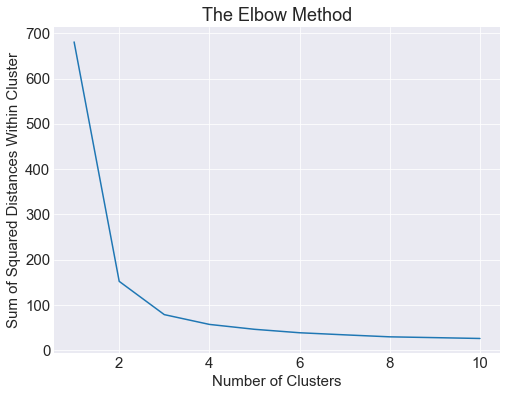

In [6]:
# Selecting the columns values as features
X = df.iloc[:, [1, 2, 3, 4]].values

# Within cluster sum of squares (distances)
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    # Sum of squared distances of samples to their closest cluster center (kmeans.inertia_)
    wcss.append(kmeans.inertia_) 
    
# Chart style and size
plt.style.use("seaborn-darkgrid")   
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the wcss onto a line graph to observe 'The elbow'  
plt.plot(range(1, 11), wcss)

# Chart parameter settings
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Sum of Squared Distances Within Cluster', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
plt.show()

The optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this i choose the number of clusters as **n_clusters = 3**.

# 2. Build Model

In [7]:
# Instantiate KMeans model
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10)
# Fitting the features data and predicting the results
y = kmeans.fit_predict(X)

# 3. Communicate Results

### Visualising the clustering results between speal lenght and width

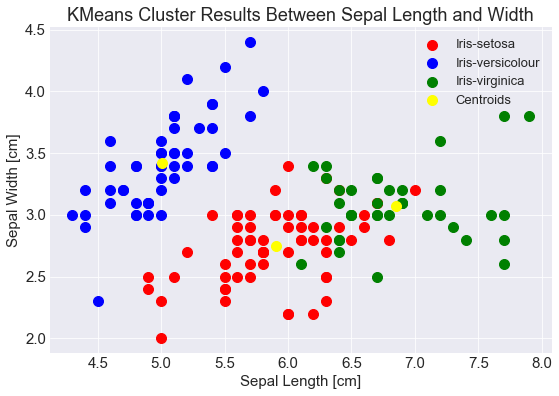

In [8]:
# Chart size
fig, ax = plt.subplots(figsize=(9, 6))

# Plotting the clusters between speal length and width
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# Chart parameter settings
plt.title("KMeans Cluster Results Between Sepal Length and Width", fontsize=18)
plt.xlabel("Sepal Length [cm]", fontsize=15)
plt.ylabel("Sepal Width [cm]", fontsize=15)
ax.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=13);

### Visualising the clustering results between petal lenght and width

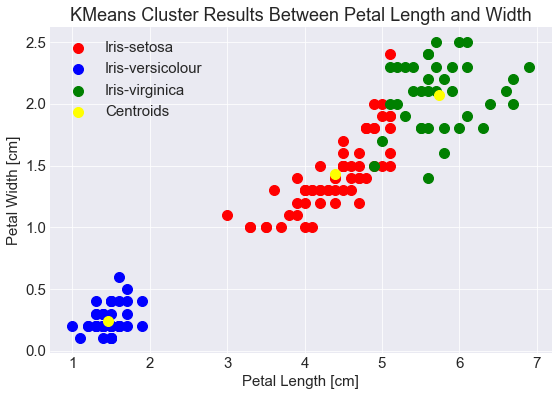

In [9]:
# Chart size
fig, ax = plt.subplots(figsize=(9, 6))

# Plotting the clusters between petal length and width
plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 2], X[y == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

# Chart parameter settings
plt.title("KMeans Cluster Results Between Petal Length and Width", fontsize=18)
plt.xlabel("Petal Length [cm]", fontsize=15)
plt.ylabel("Petal Width [cm]", fontsize=15)
ax.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=15);